In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()
for column, values in unique_values.items():
    print(column)
    print(values)

id
[      0       1       2 ... 3000885 3000886 3000887]
date
['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
store_nbr
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
family
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
sales
[0.000000e+00 2.000000e+00 8.100000e+02 ... 4.381330e+02 1.545530e+02
 2.419729e+03]
onpromotion
[  0   3   5   1  56  20  19   2   4  18  17  12   6   7  10   9  50   8
  16  42  51  13  15  47  21  40

In [7]:
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [9]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Week'] = df['date'].dt.isocalendar().week
df.head()

,id,date,store_nbr,family,sales,onpromotion,Month,Year,Week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,1


In [10]:
a=df.corr(numeric_only=True)
a

,id,store_nbr,sales,onpromotion,Month,Year,Week
id,1.000000,3.013308e-04,0.085784,0.206260,6.743357e-02,9.776028e-01,6.838384e-02
store_nbr,0.000301,1.000000e+00,0.041196,0.007286,-4.946280e-15,8.754910e-15,-5.055060e-15
sales,0.085784,4.119605e-02,1.000000,0.427923,1.978967e-02,8.109275e-02,1.637947e-02
onpromotion,0.206260,7.285647e-03,0.427923,1.000000,2.588107e-02,1.990601e-01,2.278193e-02
Month,0.067434,-4.946280e-15,0.019790,0.025881,1.000000e+00,-1.432929e-01,9.657235e-01
Year,0.977603,8.754910e-15,0.081093,0.199060,-1.432929e-01,1.000000e+00,-1.361382e-01
Week,0.068384,-5.055060e-15,0.016379,0.022782,9.657235e-01,-1.361382e-01,1.000000e+00


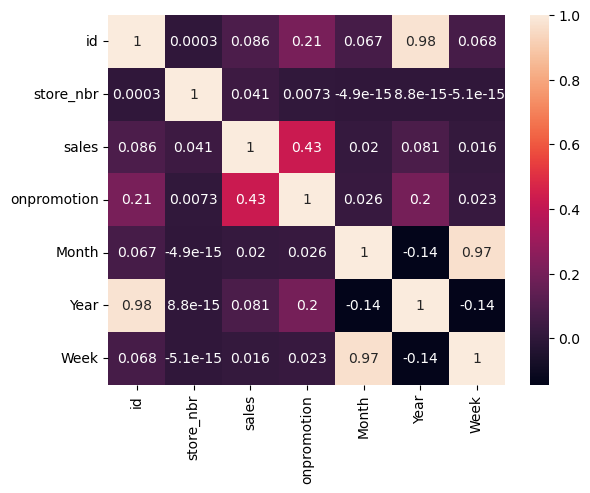

In [11]:
sns.heatmap(a,annot=True)
plt.show()

In [12]:
df.drop(columns=['id'], inplace=True)
df.head()

,date,store_nbr,family,sales,onpromotion,Month,Year,Week
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1
4,2013-01-01,1,BOOKS,0.0,0,1,2013,1


C:\Users\Riddhima\AppData\Local\Temp\ipykernel_5880\1466740702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

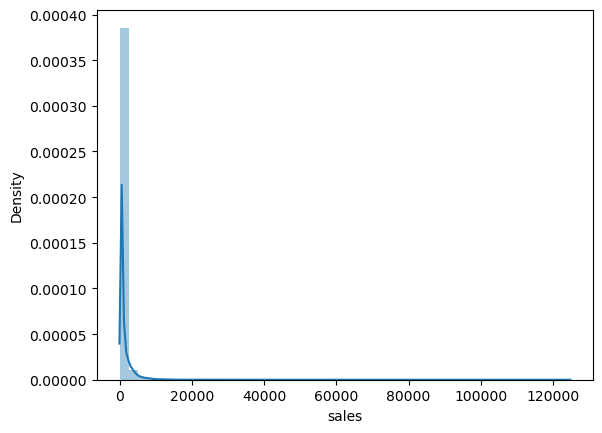

In [13]:
sns.distplot(df['sales'])

In [14]:
d1=df.groupby('store_nbr',as_index=False)['sales'].mean()
d1

,store_nbr,sales
0,1,254.534889
1,2,387.918172
2,3,908.405495
3,4,340.273886
4,5,280.580231
5,6,453.172101
6,7,484.993334
7,8,548.734739
8,9,475.229271
9,10,172.999096


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0,

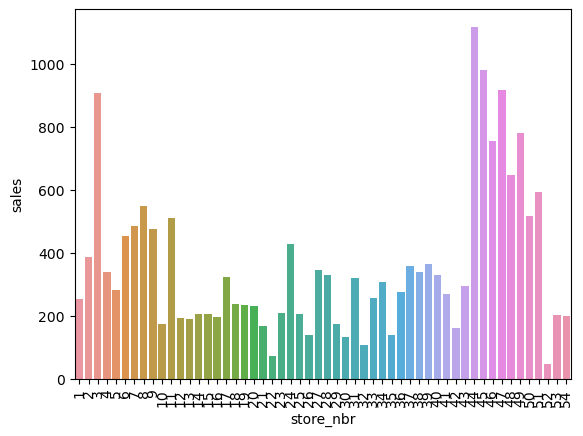

In [15]:
sns.barplot(x='store_nbr',y='sales',data=d1)
plt.xticks(rotation=90)

store 44 has highest sales and 52 has lowest sales

In [16]:
# sns.pairplot(df)

In [17]:
unique_values = df['family'].unique()
new = {value: i for i, value in enumerate(unique_values)}
df['family'] = df['family'].replace(new)
df.loc[30:]

,date,store_nbr,family,sales,onpromotion,Month,Year,Week
30,2013-01-01,1,30,0.000,0,1,2013,1
31,2013-01-01,1,31,0.000,0,1,2013,1
32,2013-01-01,1,32,0.000,0,1,2013,1
33,2013-01-01,10,0,0.000,0,1,2013,1
34,2013-01-01,10,1,0.000,0,1,2013,1
...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28,438.133,0,8,2017,33
3000884,2017-08-15,9,29,154.553,1,8,2017,33
3000885,2017-08-15,9,30,2419.729,148,8,2017,33
3000886,2017-08-15,9,31,121.000,8,8,2017,33


In [18]:
d2=df.groupby('Year',as_index=False)['sales'].mean()
d2

,Year,sales
0,2013,216.479530
1,2014,322.939786
2,2015,371.357193
3,2016,443.790297
4,2017,480.124466


<Axes: xlabel='Year', ylabel='sales'>

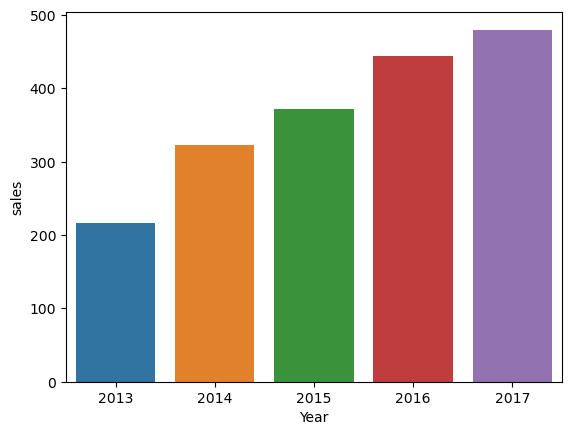

In [19]:
sns.barplot(x='Year',y='sales',data=d2)

# sales are increasing over years!!

In [20]:
d3=df.groupby('Month',as_index=False)['sales'].mean()
d3

,Month,sales
0,1,341.921554
1,2,320.928869
2,3,352.009294
3,4,339.199841
4,5,341.765820
5,6,353.597842
6,7,374.219111
7,8,336.992535
8,9,362.297418
9,10,362.407132


<Axes: xlabel='Month', ylabel='sales'>

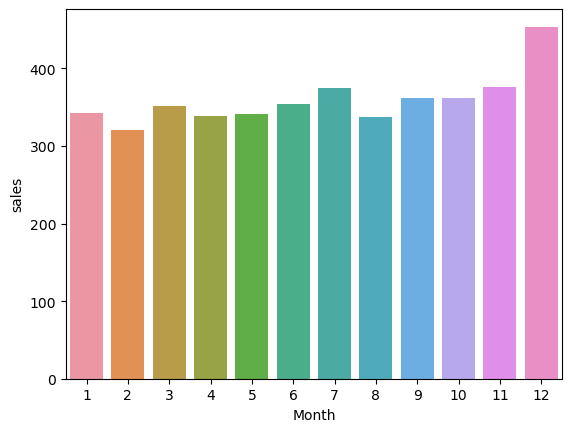

In [21]:
sns.barplot(x='Month',y='sales',data=d3)

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_5880\3166675449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['onpromotion'])


<Axes: xlabel='onpromotion', ylabel='Density'>

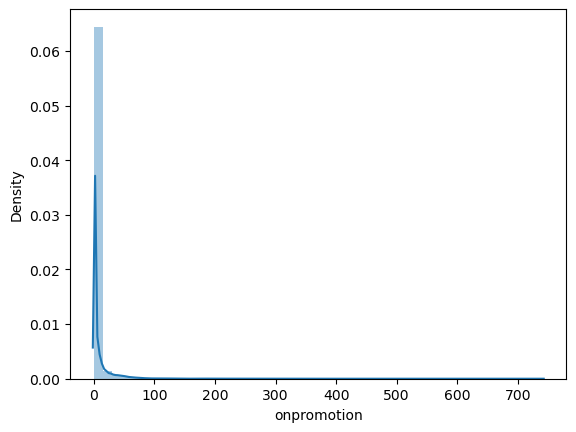

In [22]:
sns.distplot(df['onpromotion'])

<Axes: xlabel='onpromotion', ylabel='sales'>

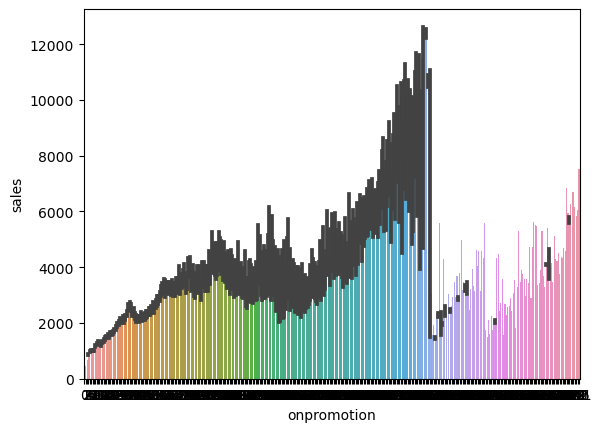

In [23]:
sns.barplot(x='onpromotion',y='sales',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

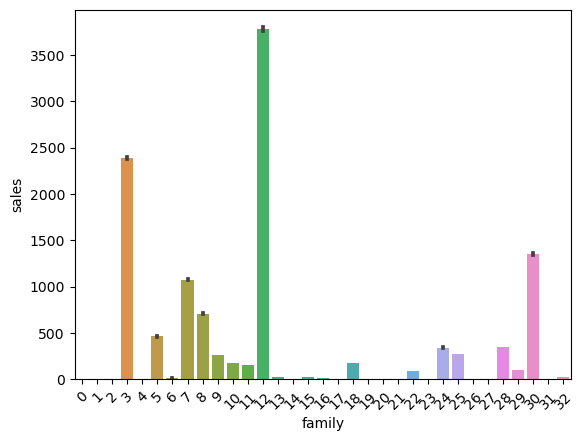

In [28]:
sns.barplot(x='family',y='sales',data=df)
plt.xticks(rotation=45)

In [24]:
df

,date,store_nbr,family,sales,onpromotion,Month,Year,Week
0,2013-01-01,1,0,0.000,0,1,2013,1
1,2013-01-01,1,1,0.000,0,1,2013,1
2,2013-01-01,1,2,0.000,0,1,2013,1
3,2013-01-01,1,3,0.000,0,1,2013,1
4,2013-01-01,1,4,0.000,0,1,2013,1
...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28,438.133,0,8,2017,33
3000884,2017-08-15,9,29,154.553,1,8,2017,33
3000885,2017-08-15,9,30,2419.729,148,8,2017,33
3000886,2017-08-15,9,31,121.000,8,8,2017,33


In [25]:
df.drop(columns=['date'], inplace=True)
df.head()

,store_nbr,family,sales,onpromotion,Month,Year,Week
0,1,0,0.0,0,1,2013,1
1,1,1,0.0,0,1,2013,1
2,1,2,0.0,0,1,2013,1
3,1,3,0.0,0,1,2013,1
4,1,4,0.0,0,1,2013,1


In [29]:
x=df
y= df['sales'] 

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [31]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [32]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=30)
mse

array([-5.22338215e-23, -2.85144087e-22, -3.99250551e-22, -8.46947229e-23,
       -5.04449749e-22, -3.78885195e-23, -5.75106357e-23, -7.53502663e-23,
       -2.55693747e-23, -1.43463813e-22, -6.71285770e-23, -4.11986615e-23,
       -2.30017548e-23, -2.31977060e-22, -1.53486945e-22, -2.46953351e-22,
       -2.61282471e-23, -2.52215340e-22, -7.52973039e-23, -1.36004690e-22,
       -1.71730830e-22, -4.40463892e-23, -6.82986690e-23, -2.70429288e-22,
       -1.82736993e-22, -1.32783327e-22, -9.44232910e-23, -1.09194077e-22,
       -9.37420662e-23, -9.63920728e-23])

In [34]:
np.mean(mse)

-1.3942414920270503e-22

In [35]:
reg_pred=regression.predict(x_test)
reg_pred

array([2.3470000e+03, 1.1100000e+02, 2.1032065e-12, ..., 1.0000000e+00,
       1.0520000e+03, 1.0042400e+02])

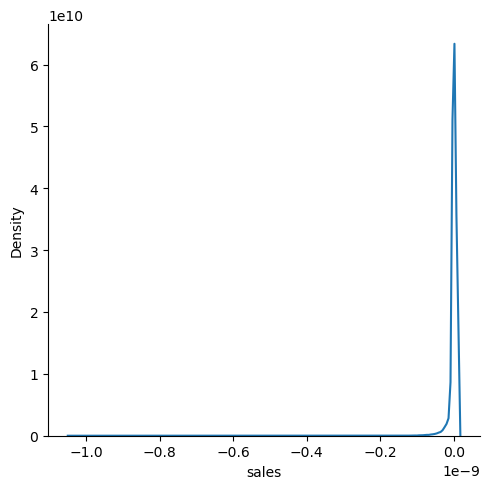

In [36]:
sns.displot(reg_pred-y_test,kind='kde')